In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
X_train_std[:5], X_train_std[:5]

(array([[-0.4134164 , -1.46200287],
        [ 0.55122187, -0.50256349],
        [ 0.67180165,  0.21701605],
        [ 0.91296121, -0.02284379],
        [ 1.63643991,  1.41631528]]),
 array([[-0.4134164 , -1.46200287],
        [ 0.55122187, -0.50256349],
        [ 0.67180165,  0.21701605],
        [ 0.91296121, -0.02284379],
        [ 1.63643991,  1.41631528]]))

In [7]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)
tree.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [8]:
y_pred_tree = tree.predict(X_test_std)
print(classification_report(y_test, y_pred_tree, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      0.95      0.97        19
  versicolor       0.62      0.62      0.62        13
   virginica       0.64      0.69      0.67        13

    accuracy                           0.78        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.79      0.78      0.78        45



In [9]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree,
                           filled=True, 
                           rounded=True,
                           class_names=iris.target_names,
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data)

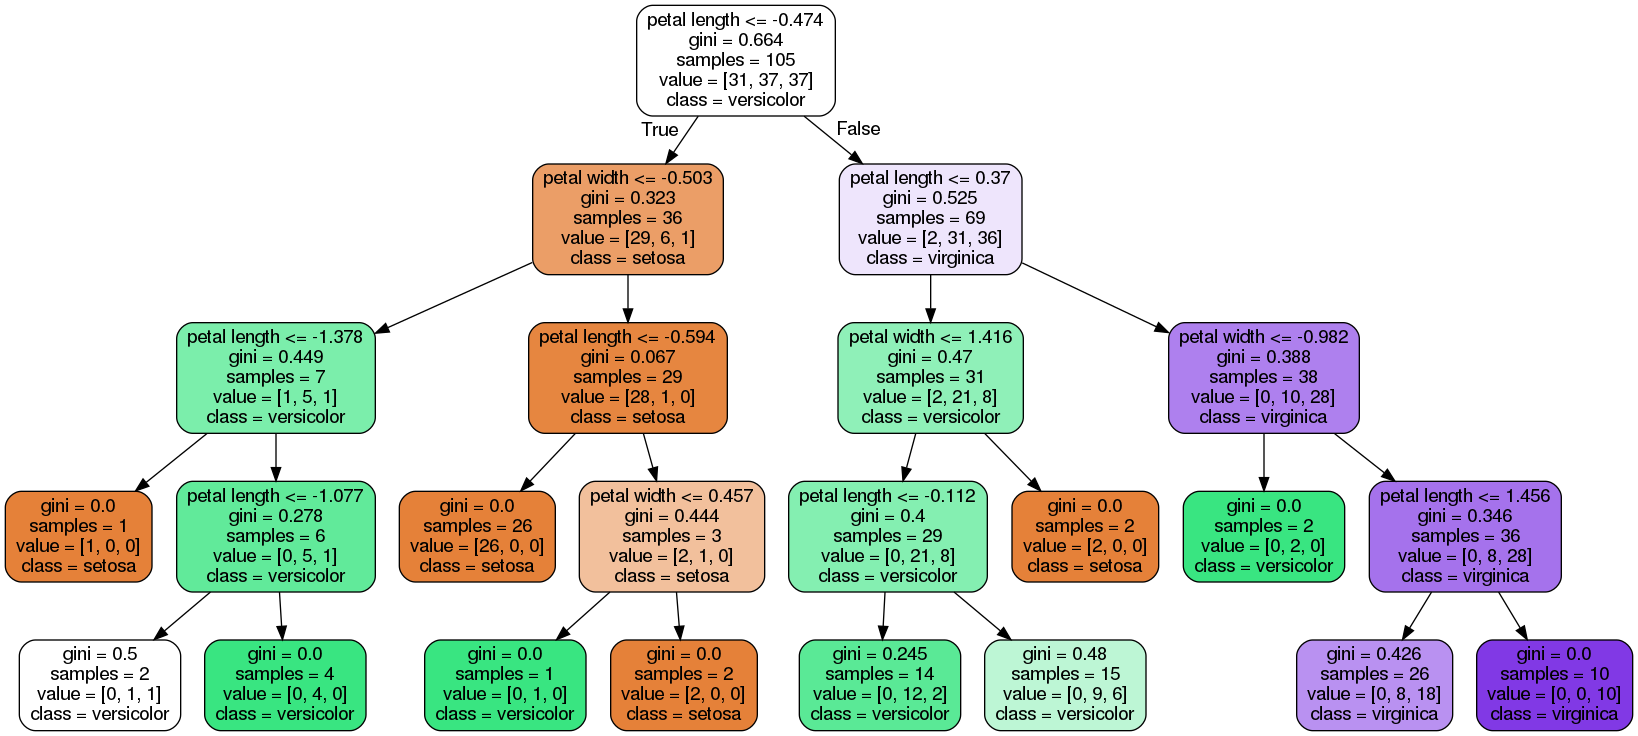

In [10]:
from IPython.display import Image 
Image(graph.create_png())